# Market Size of EVs: Case Study

In [183]:
import pandas as pd
import datetime  

In [131]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [132]:
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [133]:
# Reviewing the columns names.
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [134]:
#let's check the shape of the dataset

data.shape

(177866, 17)

In [135]:
data.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [136]:
# removing the unwanted columns
data.drop(['VIN (1-10)','DOL Vehicle ID','Legislative District'], axis=1,inplace=True)

In [137]:
# filled the missing values
data['Postal Code'].fillna(method='bfill', inplace=True)


In [138]:
data['City'].fillna(method='bfill', inplace=True)

In [151]:
data.isnull().sum()

County                                               5
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Vehicle Location                                     9
Electric Utility                                     5
2020 Census Tract                                    5
dtype: int64

In [140]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,2020 Census Tract
count,177866.000000,177866.000000,177866.000000,177866.000000,1.778610e+05
mean,98172.457738,2020.515512,58.842162,1073.109363,5.297672e+10
std,2442.416943,2.989384,91.981298,8358.624956,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,5.603300e+10


In [141]:
df=data.head(10)

In [142]:
#EDA process
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [143]:
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility,2020 Census Tract
0,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
5,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10
6,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
7,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
8,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10
9,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [153]:
df['County'].fillna('King')

0         King
1    Snohomish
2         King
3         King
4       Kitsap
5     Thurston
6       Yakima
7    Snohomish
8       Kitsap
9         King
Name: County, dtype: object

In [154]:
df['County'].value_counts()

County
King         4
Snohomish    2
Kitsap       2
Thurston     1
Yakima       1
Name: count, dtype: int64

In [158]:
a = df[['County','City','State']]

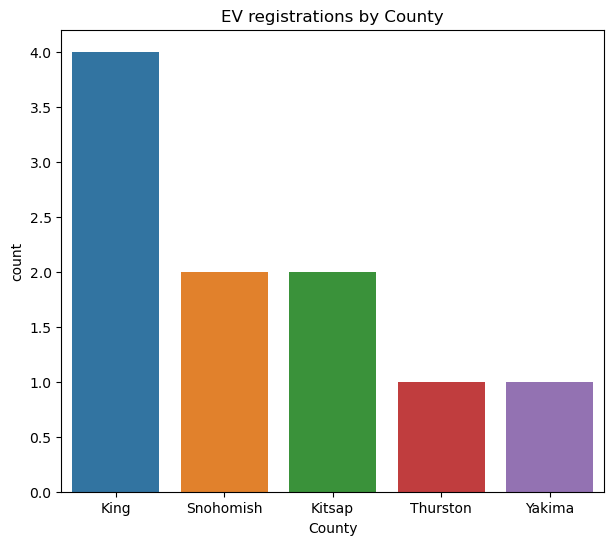

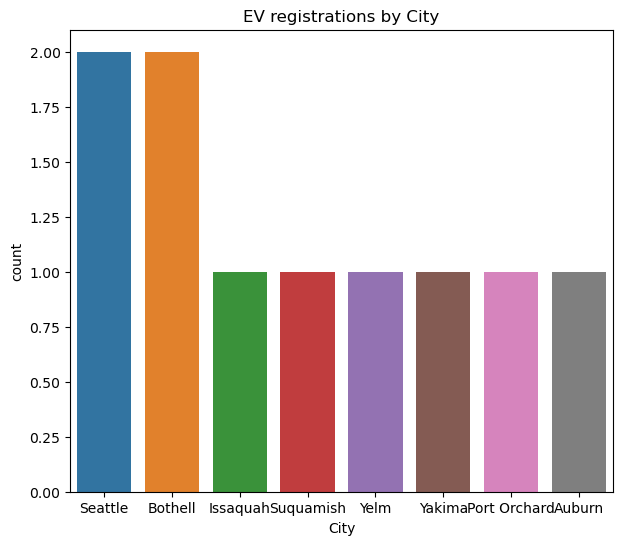

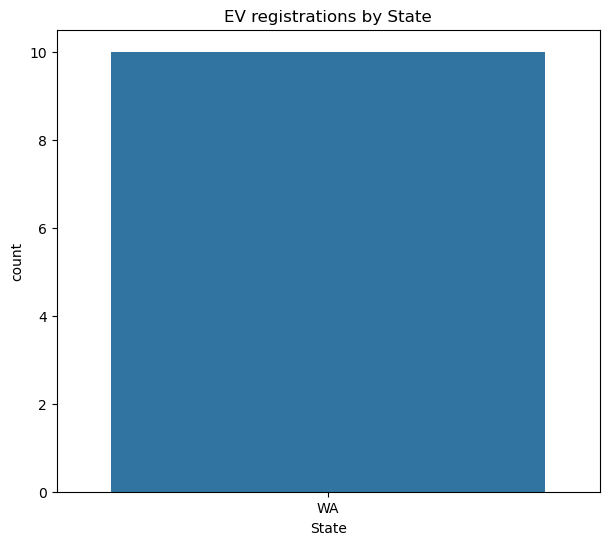

In [166]:
for col in a:
    plt.figure(figsize=(7,6))
    sns.countplot(x=col, data= df)
    plt.title(f'EV registrations by {col}')
    plt.show()
    



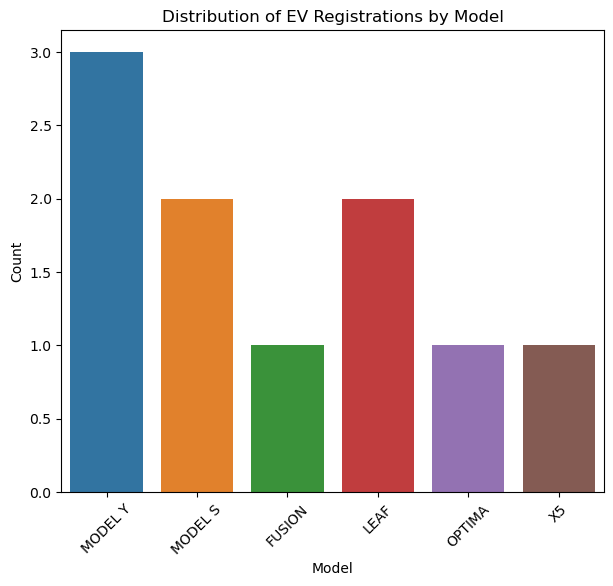

In [162]:
plt.figure(figsize=(7,6))
sns.countplot(x="Model", data= df)
plt.title('Distribution of EV Registrations by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

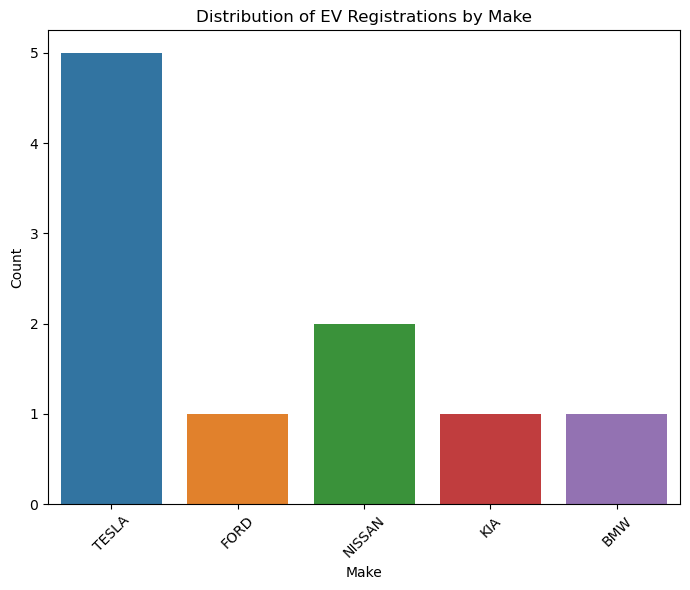

In [224]:
plt.figure(figsize=(7,6))
sns.countplot(x="Make", data= df)
plt.title('Distribution of EV Registrations by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [170]:
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location,Electric Utility,2020 Census Tract
0,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
5,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10
6,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
7,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
8,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10
9,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [171]:
#checking the relationship b/w range & Msrp 
correlation = data[['Electric Range', 'Base MSRP']].corr()
print(correlation)


                Electric Range  Base MSRP
Electric Range        1.000000   0.108231
Base MSRP             0.108231   1.000000


In [172]:
# Estimate the market size and growth potential of the EV market for upcoming years.

In [177]:
total_ev_registered = len(df)  # Total number of EV registrations in the dataset


In [178]:
total_ev_registered 

10

In [182]:
# Count of EV registrations by Electric Vehicle Type
ev_type_counts = df['Electric Vehicle Type'].value_counts()

# Count of EV registrations by Make
make_counts = df['Make'].value_counts()

# Count of EV registrations by Model
model_counts = df['Model'].value_counts()


In [184]:
# Example: Forecasting future growth based on historical data (using hypothetical growth rate)
historical_growth_rate = 0.05  # Assuming a 5% annual growth rate
current_year = pd.to_datetime('today').year
future_years = range(current_year + 1, current_year + 6)
forecasted_ev_counts = [total_ev_registered * (1 + historical_growth_rate)**(year - current_year) for year in future_years]


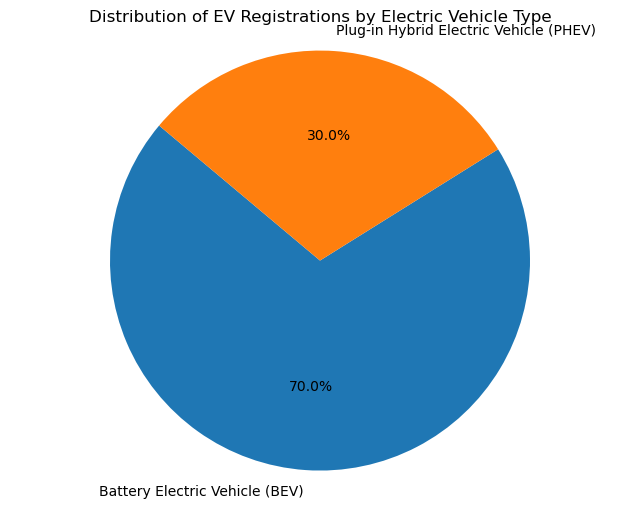

In [185]:
plt.figure(figsize=(8, 6))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of EV Registrations by Electric Vehicle Type')
plt.axis('equal')
plt.show()

In [199]:
ev_type_counts = df['Electric Vehicle Type'].value_counts()

In [200]:
ev_type_counts

Electric Vehicle Type
Battery Electric Vehicle (BEV)            7
Plug-in Hybrid Electric Vehicle (PHEV)    3
Name: count, dtype: int64

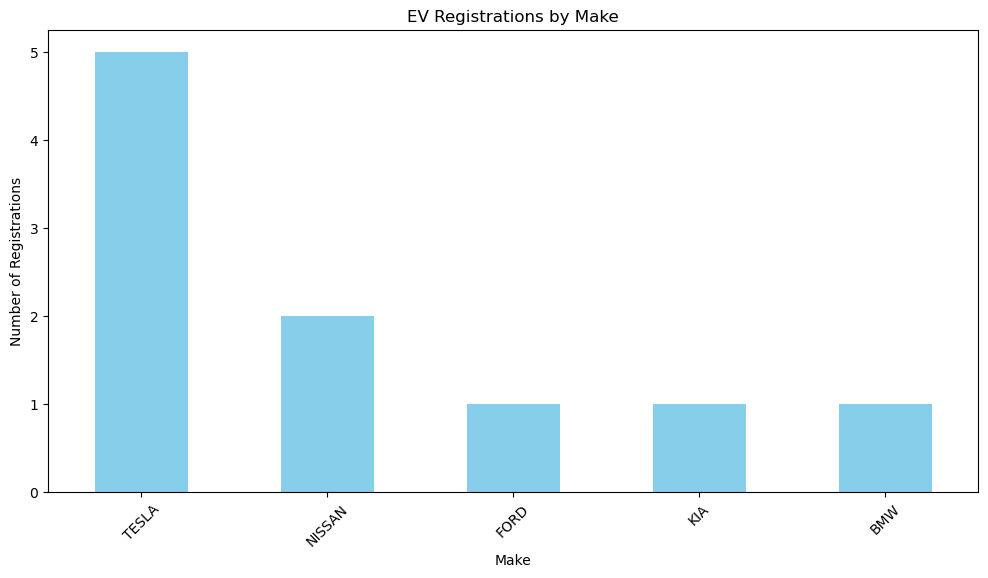

In [201]:
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color='skyblue')
plt.title('EV Registrations by Make')
plt.xlabel('Make')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

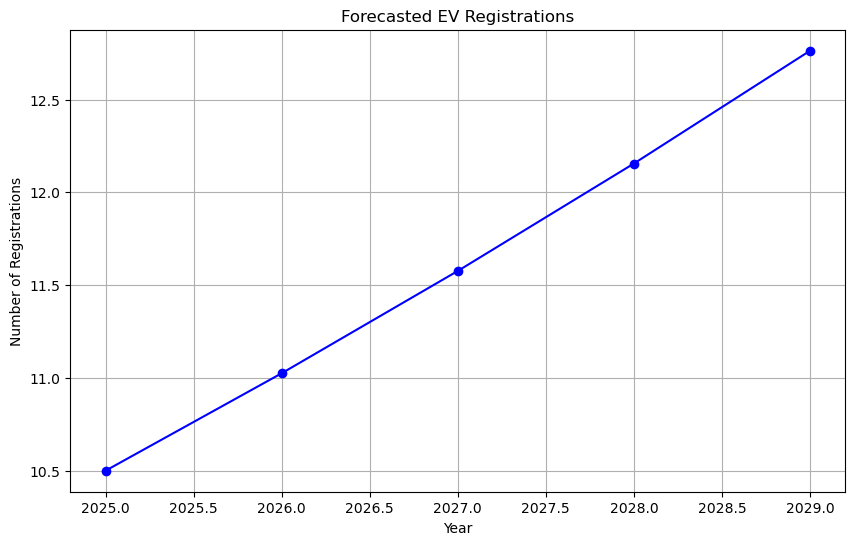

In [202]:
plt.figure(figsize=(10, 6))
plt.plot(future_years, forecasted_ev_counts, marker='o', linestyle='-', color='b')
plt.title('Forecasted EV Registrations')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()